In [1]:
#https://www.kaggle.com/alxmamaev/flowers-recognition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from numpy import savetxt

In [3]:
import glob
glob.glob("/home/user/Downloads/flowers/*")

['/home/user/Downloads/flowers/daisy',
 '/home/user/Downloads/flowers/dandelion',
 '/home/user/Downloads/flowers/rose',
 '/home/user/Downloads/flowers/sunflower',
 '/home/user/Downloads/flowers/tulip']

In [4]:
#smaller dataset
img_paths_daisy = glob.glob("/home/user/Downloads/flowers/daisy/*")[:20]
img_paths_dandelion = glob.glob("/home/user/Downloads/flowers/dandelion/*")[:20]
img_paths_rose = glob.glob("/home/user/Downloads/flowers/rose/*")[:20]
img_paths_sunflower = glob.glob("/home/user/Downloads/flowers/sunflower/*")[:20]
img_paths_tulip = glob.glob("/home/user/Downloads/flowers/tulip/*")[-20:]
img_paths = np.concatenate((img_paths_daisy, img_paths_dandelion, img_paths_rose, img_paths_sunflower, img_paths_tulip))

In [5]:
img_paths

array(['/home/user/Downloads/flowers/daisy/100080576_f52e8ee070_n.jpg',
       '/home/user/Downloads/flowers/daisy/10140303196_b88d3d6cec.jpg',
       '/home/user/Downloads/flowers/daisy/10172379554_b296050f82_n.jpg',
       '/home/user/Downloads/flowers/daisy/10172567486_2748826a8b.jpg',
       '/home/user/Downloads/flowers/daisy/10172636503_21bededa75_n.jpg',
       '/home/user/Downloads/flowers/daisy/102841525_bd6628ae3c.jpg',
       '/home/user/Downloads/flowers/daisy/10300722094_28fa978807_n.jpg',
       '/home/user/Downloads/flowers/daisy/1031799732_e7f4008c03.jpg',
       '/home/user/Downloads/flowers/daisy/10391248763_1d16681106_n.jpg',
       '/home/user/Downloads/flowers/daisy/10437754174_22ec990b77_m.jpg',
       '/home/user/Downloads/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg',
       '/home/user/Downloads/flowers/daisy/10437929963_bc13eebe0c.jpg',
       '/home/user/Downloads/flowers/daisy/10466290366_cc72e33532.jpg',
       '/home/user/Downloads/flowers/daisy/10466558316_

In [6]:
#orig dataset
# img_paths = glob.glob("/home/user/Downloads/flowers/*/*")
# img_paths

In [7]:
from PIL import Image

In [8]:
for img in img_paths:
    Image.open(img)
    break

In [9]:
img

'/home/user/Downloads/flowers/daisy/100080576_f52e8ee070_n.jpg'

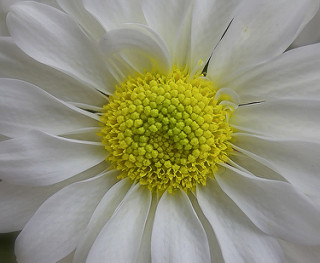

In [10]:
Image.open(img)

In [11]:
Image.open(img).size

(320, 263)

In [12]:
np.array(Image.open(img))

array([[[135, 135, 133],
        [138, 138, 136],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[134, 134, 132],
        [137, 137, 135],
        [141, 141, 139],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[133, 133, 131],
        [136, 136, 134],
        [141, 141, 139],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 45,  48,  27],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [130, 126, 125],
        [130, 126, 125],
        [129, 125, 124]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [130, 126, 125],
        [130, 126, 125],
        [130, 126, 125]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [132, 128, 127],
        [132, 128, 127],
        [132, 128, 127]]

In [13]:
np.array(Image.open(img)).shape

(263, 320, 3)

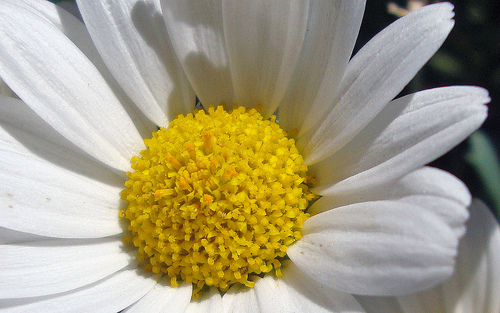

In [14]:
Image.open(img_paths[1])

In [15]:
np.array(Image.open(img_paths[1])).shape

(313, 500, 3)

In [16]:
resized = np.array(Image.open(img_paths[1]).resize((150,150)))

In [17]:
resized.shape

(150, 150, 3)

In [18]:
resized

array([[[218, 221, 228],
        [212, 212, 220],
        [214, 217, 226],
        ...,
        [  9,   8,  14],
        [ 12,  13,  17],
        [  8,   7,  12]],

       [[217, 217, 225],
        [223, 226, 233],
        [217, 217, 225],
        ...,
        [ 15,  13,  16],
        [  7,   6,  11],
        [  7,   8,  12]],

       [[229, 229, 237],
        [217, 224, 230],
        [222, 223, 228],
        ...,
        [ 13,  14,  16],
        [ 12,  11,  16],
        [  0,   1,   5]],

       ...,

       [[173, 172, 178],
        [182, 180, 185],
        [187, 192, 196],
        ...,
        [159, 153, 137],
        [172, 168, 157],
        [181, 172, 167]],

       [[207, 212, 216],
        [219, 227, 230],
        [220, 225, 229],
        ...,
        [159, 150, 133],
        [176, 168, 155],
        [181, 170, 164]],

       [[226, 227, 232],
        [224, 229, 235],
        [233, 238, 242],
        ...,
        [153, 146, 127],
        [175, 168, 152],
        [179, 168, 164]]

In [19]:
Image.fromarray(resized).save('resized.jpg')

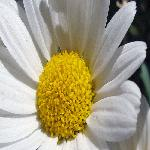

In [20]:
Image.open('resized.jpg')

In [21]:
#flowers = np.empty([150,150,3])
X = []
y = []
for img in img_paths:
    a=Image.open(img)
    resizedimg = np.array(Image.open(img).resize((64, 64)).convert("L"))
    X.append(resizedimg)
    y.append((img.split("/")[-2]))
    
    #np.append(flowers, resizedimg)
X = np.stack(X)

In [22]:
X.shape

(100, 64, 64)

In [23]:
X.shape

(100, 64, 64)

In [24]:
flowers = np.transpose(X)

In [25]:
flowers.shape

(64, 64, 100)

In [26]:
np.save('flowers', X)

In [27]:
loaded_flowers = np.load('flowers.npy')

In [28]:
loaded_flowers

array([[[140, 149, 152, ..., 161, 153, 153],
        [134, 145, 168, ..., 158, 154, 149],
        [124, 139, 152, ..., 156, 156, 142],
        ...,
        [ 40,  42,  48, ..., 124, 121, 122],
        [ 42,  42,  52, ..., 127, 126, 124],
        [ 43,  44,  52, ..., 134, 130, 127]],

       [[223, 210, 218, ...,  20,  14,  13],
        [231, 221, 218, ...,  32,  17,   3],
        [224, 238, 232, ...,  33,  15,  10],
        ...,
        [179, 178, 186, ..., 144, 133, 168],
        [177, 168, 197, ..., 141, 129, 173],
        [229, 231, 231, ..., 141, 137, 174]],

       [[118,  90, 101, ..., 129, 167, 138],
        [ 91,  56,  80, ..., 140, 116, 119],
        [ 81,  75,  79, ..., 103, 116, 107],
        ...,
        [ 15,  16,  11, ...,  29,  35,  35],
        [ 18,  15,  20, ...,  29,  31,  33],
        [ 16,  18,  12, ...,  34,  37,  39]],

       ...,

       [[ 61,  62,  89, ..., 152, 157, 155],
        [ 47,  64, 122, ..., 126, 130, 139],
        [ 54,  94,  78, ...,  93, 104,  68

In [29]:
loaded_flowers.shape

(100, 64, 64)

In [30]:
daisy = len(glob.glob("/home/user/Downloads/flowers/daisy/*"))
dandelion = len(glob.glob("/home/user/Downloads/flowers/dandelion/*"))
rose = len(glob.glob("/home/user/Downloads/flowers/rose/*"))
sunflower = len(glob.glob("/home/user/Downloads/flowers/sunflower/*"))
tulip = len(glob.glob("/home/user/Downloads/flowers/tulip/*"))

In [38]:
#y for smaller dataset
flowertype = []
for i in range(20):
    flowertype.append(1)
for i in range(20):
    flowertype.append(2)
for i in range(20):
    flowertype.append(3)
for i in range(20):
    flowertype.append(4)
for i in range(20):
    flowertype.append(5)

In [39]:
# flowertype = []
# for i in range(daisy):
#     flowertype.append(1)
# for i in range(dandelion):
#     flowertype.append(2)
# for i in range(rose):
#     flowertype.append(3)
# for i in range(sunflower):
#     flowertype.append(4)
# for i in range(tulip):
#     flowertype.append(5)

In [40]:
y

['daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',


In [41]:
flowertype

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [42]:
len(flowertype)

100

In [43]:
len(y)

100

In [44]:
X2 = X.reshape(X.shape[0],-1)

In [45]:
X2.shape

(100, 4096)

5 questions. What doesn't make sense

* why did you get rid of the colors
* i had a 4d array but now its 3d?
* whats wrong with logreg.predict
* 

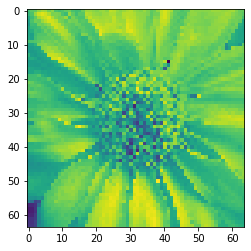

In [71]:
plt.imshow(X[0].reshape(64,64))

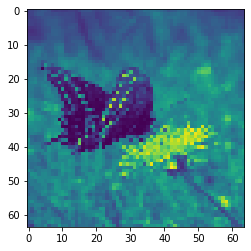

In [72]:
plt.imshow(X[25])

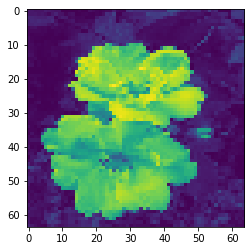

In [74]:
plt.imshow(X[40])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X2, flowertype, test_size=.4)

In [91]:
logreg = LogisticRegression()
y_pred = logreg.fit(X2, flowertype)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
logreg.score(X2, flowertype)

1.0

In [84]:
X[0].reshape(1,4096)

array([[140, 149, 152, ..., 134, 130, 127]], dtype=uint8)

In [87]:
ans = logreg.predict(X[98].reshape(1,4096))

In [88]:
ans

array([5])

In [51]:
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
h = .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
#larger h

In [52]:
#Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [93]:
from sklearn.linear_model import LinearRegression

In [135]:
clf = LogisticRegression(C=1e5)
y_pred = clf.fit(X2, flowertype) 

In [136]:
y_pred

LogisticRegression(C=100000.0)

In [137]:
clf

LogisticRegression(C=100000.0)

In [142]:
#coef_ndarray of shape (1, n_features) or (n_classes, n_features)
y_pred.coef_.shape

(5, 4096)

In [149]:
arr = y_pred.coef_[0]

In [150]:
arr

array([-7.54233585e-04, -4.84722151e-04,  1.95494558e-04, ...,
        8.84091865e-04,  1.08027182e-03, -5.61301063e-05])

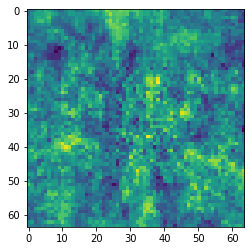

In [151]:
plt.imshow(arr.reshape(64,64))

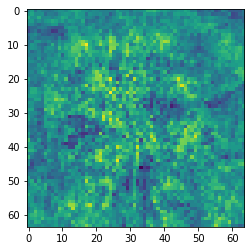

In [153]:
arr2 = y_pred.coef_[1]
plt.imshow(arr2.reshape(64,64))

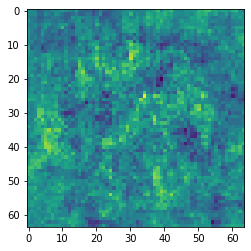

In [154]:
arr3 = y_pred.coef_[2]
plt.imshow(arr3.reshape(64,64))

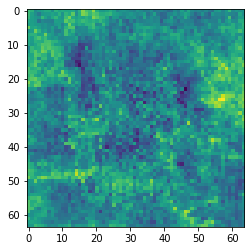

In [155]:
arr4 = y_pred.coef_[3]
plt.imshow(arr4.reshape(64,64))

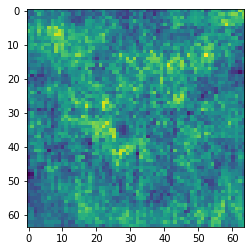

In [156]:
arr5 = y_pred.coef_[4]
plt.imshow(arr5.reshape(64,64))

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [55]:
gnb.score(X_train, y_train)

0.7666666666666667

In [56]:
y_pred

array([1, 2, 4, 1, 1, 2, 4, 1, 1, 4, 3, 4, 3, 4, 3, 1, 4, 4, 3, 2, 2, 2,
       4, 3, 4, 2, 1, 2, 4, 1, 3, 1, 2, 3, 3, 4, 2, 2, 3, 2])

In [57]:
# x_min, x_max = flowers2[:, 0].min() - .5, flowers2[:, 0].max() + .5
# y_min, y_max = flowers2[:, 1].min() - .5, flowers2[:, 1].max() + .5
# h = .02
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

([], [])

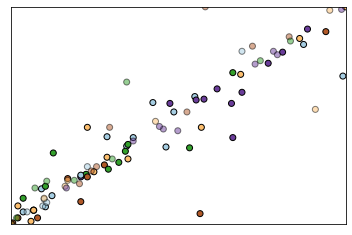

In [58]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [59]:
#Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
clf = DecisionTreeClassifier()

In [62]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [63]:
y_pred

array([1, 2, 1, 2, 5, 3, 4, 4, 5, 1, 4, 4, 3, 1, 4, 1, 4, 4, 5, 3, 2, 5,
       5, 3, 3, 1, 5, 1, 1, 4, 5, 1, 2, 3, 3, 1, 1, 3, 4, 5])

In [64]:
clf.score(X_train, y_train)

1.0

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
clf = MLPClassifier()

In [67]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [69]:
y_pred

array([4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4])

In [68]:
clf.score(X_train, y_train)

0.21666666666666667